In [10]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib  inline
from sklearn.metrics import auc,roc_curve
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style(style="darkgrid")

In [6]:
# 真实类别
y = np.array([1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0])
# 算法预测的概率
prob = np.array([0.42,0.73,0.55,0.37,0.57,0.70,0.25,0.23,
                 0.46,0.62,0.76,0.46,0.55,0.56,0.56,0.38,0.37,0.73,0.77,0.21,0.39])

In [25]:
fpr,tpr,threshold=roc_curve(y,prob)

In [28]:
threshold

array([1.  , 0.77, 0.76, 0.73, 0.57, 0.56, 0.55, 0.46, 0.42, 0.38, 0.37,
       0.21])

In [27]:
threshold[0]=1

In [13]:
fpr.shape

(12,)

In [14]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11111111, 0.33333333, 0.33333333, 0.55555556,
       0.66666667, 1.        ])

In [15]:
ks=tpr-fpr

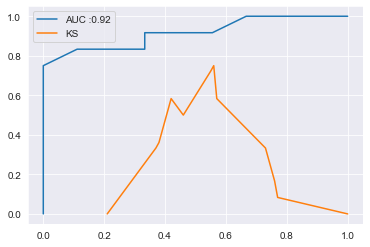

In [30]:
# ROC 曲线
plt.plot(fpr,tpr,label="AUC :%0.2f"%(auc(fpr,tpr)))

# KS 洛伦兹曲线 
plt.plot(threshold,ks,label="KS")

plt.legend(loc="best")

In [67]:
threshold=np.arange(0,1.1,0.01)
threshold

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09])

In [68]:
from sklearn.metrics import confusion_matrix # 混淆矩阵

In [69]:
fprs=[]
tprs=[]
for t in threshold:
    y_=(prob>=t).astype(np.int8)
    m=confusion_matrix(y_,y)
    fpr=m[1,0]/(m[0,0]+m[1,0])
    tpr=m[1,1]/(m[0,1]+m[1,1])
    fprs.append(fpr)
    tprs.append(tpr)
#     auc_=auc(fpr,tpr)

In [70]:
fprs

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8888888888888888,
 0.8888888888888888,
 0.7777777777777778,
 0.7777777777777778,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.5555555555555556,
 0.4444444444444444,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

Text(0.8, 0.85, '最合适的阈值 : 0.56')

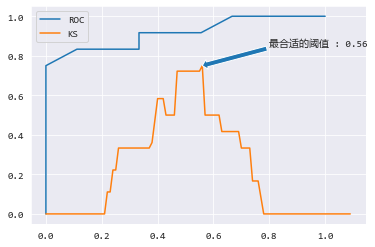

In [84]:
from matplotlib import rcParams

rcParams["font.sans-serif"]="Consolas-with-Yahei"
# ROC曲线 
plt.plot(fprs,tprs)

# KS 洛伦兹曲线
ks=np.array(tprs)-np.array(fprs)
plt.plot(threshold,(ks))

plt.legend(["ROC","KS"])


index=ks.argmax()
threshold[index]
"""
      width        The width of the arrow in points
    headwidth    The width of the base of the arrow head in points
    headlength   The length of the arrow head in points
    shrink       Fraction of total length to shrink from both ends
"""
plt.annotate(
    text="最合适的阈值 : 0.56",
    xy=(0.56,0.75),
    xytext=(0.8,0.85),
    arrowprops={
    "width":5,
        "headwidth":10,
        "headlength":5
    
    }
)

In [76]:
ks.max()

0.75

In [78]:
ks.argmax()

56